## Caracterizando a Forma de um Objeto em uma Imagem com Momentos Estatísticos
***

Quando nós trabalhamos com visão computacional podemos utilizar momentos estatísticos para definir o shape/forma de objetos dentro de uma imagem.

Momentos estatísticos são média, variacia, desvio padrão e etc...

Vou utilizar os momentos estatísticos como extrator de recursos para criar o meu vetor de recursos para identificar que objetos/shapes eu tenho dentro de uma imagem.

***
### Extraindo HuMoments
***

Do ponto de vista estritamente estatístico, "momentos" são apenas expectativas estatísticas de uma variável aleatória. Na verdade, você provavelmente já está familiarizado com pelo menos um momento, tenha você percebido ou não!

O momento mais comum é o primeiro momento, a média. Você também está muito familiarizado com o segundo momento, a variância - e tomar a raiz quadrada da variância nos deixa com o desvio padrão, que provavelmente você também está familiarizado. Inclinação (skewness) e curtose (kurtosis) completam os terceiro e quarto momentos, respectivamente.

O descritor Hu Moments retorna um vetor de características de valor real de sete valores (momentos). Esses sete valores capturam e quantificam a forma do objeto em uma imagem. Podemos então comparar o shape do nosso vetor de características com outros vetores de recursos para determinar como duas formas são "semelhantes".

***

In [1]:
from matplotlib import pyplot as plt
import cv2


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
# Carrega e converte para Grayscale
image = cv2.imread("imagens/planes.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ORIGINAL MOMENTS: [ 8.89880773e-03  7.57204412e-05  2.38651674e-08  1.85900330e-08
  3.91558010e-16  1.61708196e-10 -2.12085766e-18]


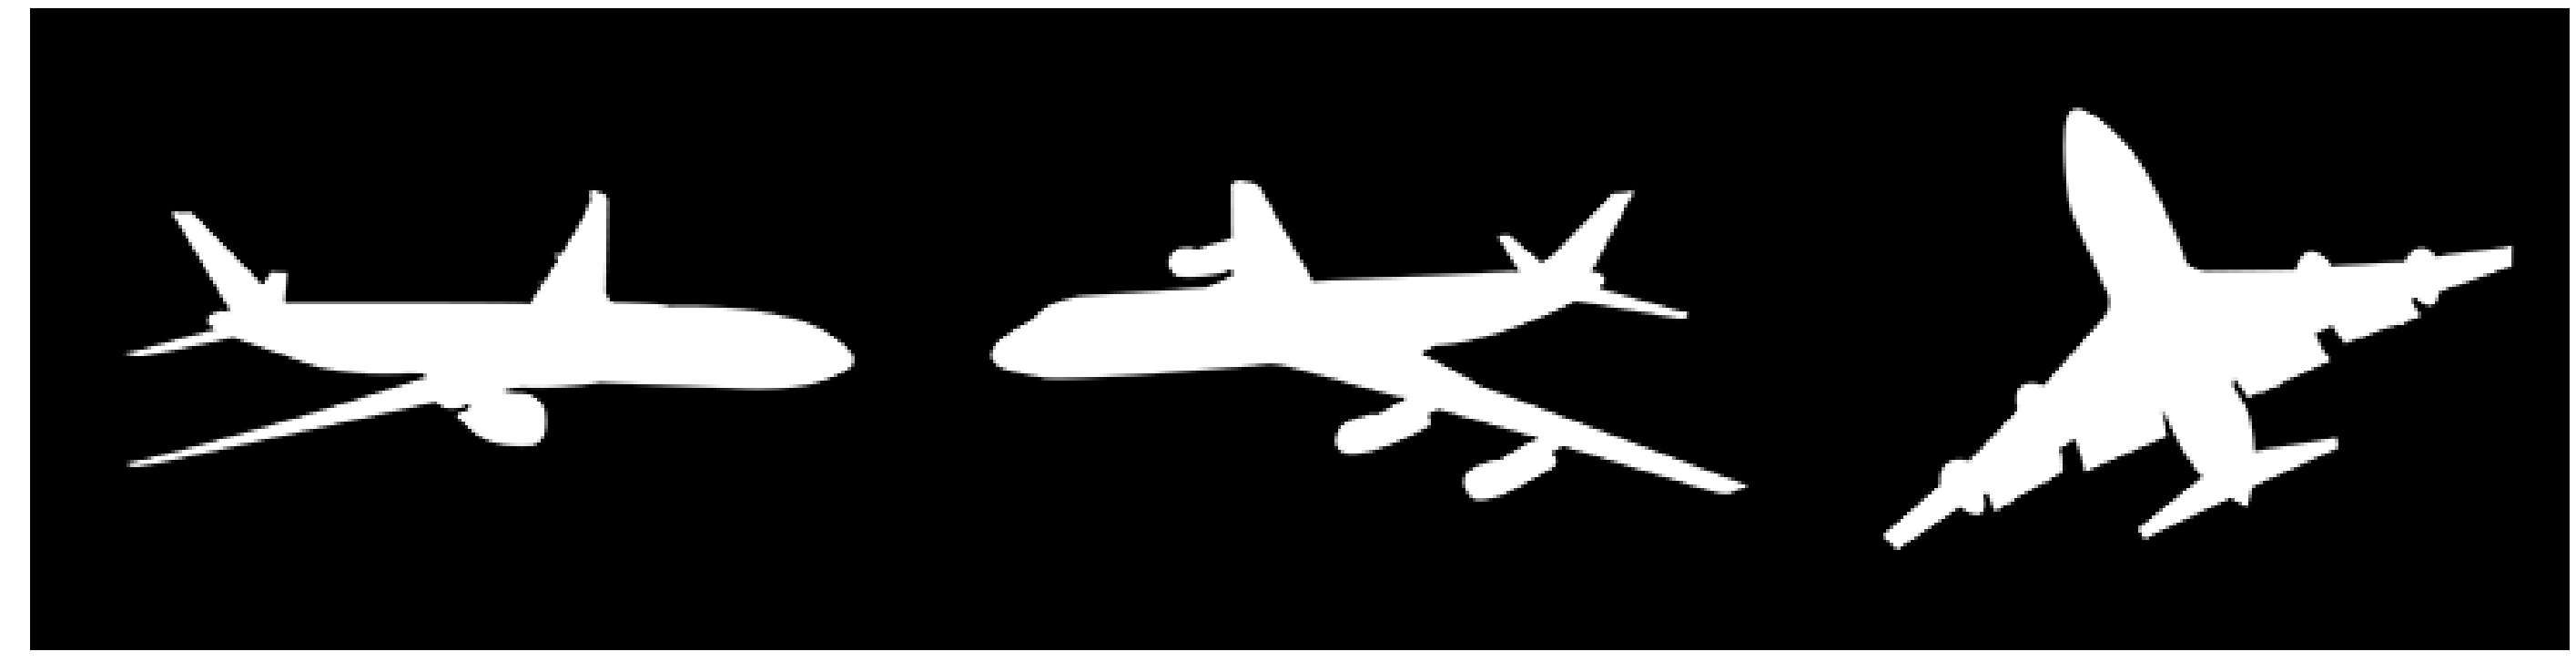

In [3]:
# Calcula o vetor de recursos Hu Moments para toda a imagem (NÃO É O IDEAL)
# moments nada mais são que as estatísticas coletadas das imagens
moments = cv2.HuMoments(cv2.moments(image)).flatten()
print("ORIGINAL MOMENTS: {}".format(moments))
show(image)

In [4]:
# Encontra os contornos dos três planos na imagem
cnts, _ = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

MOMENTS FOR PLANE #1: [2.00162991e-03 3.01754249e-06 3.08984971e-11 4.14364409e-11
 4.97600769e-22 5.93897843e-14 1.39666817e-21]


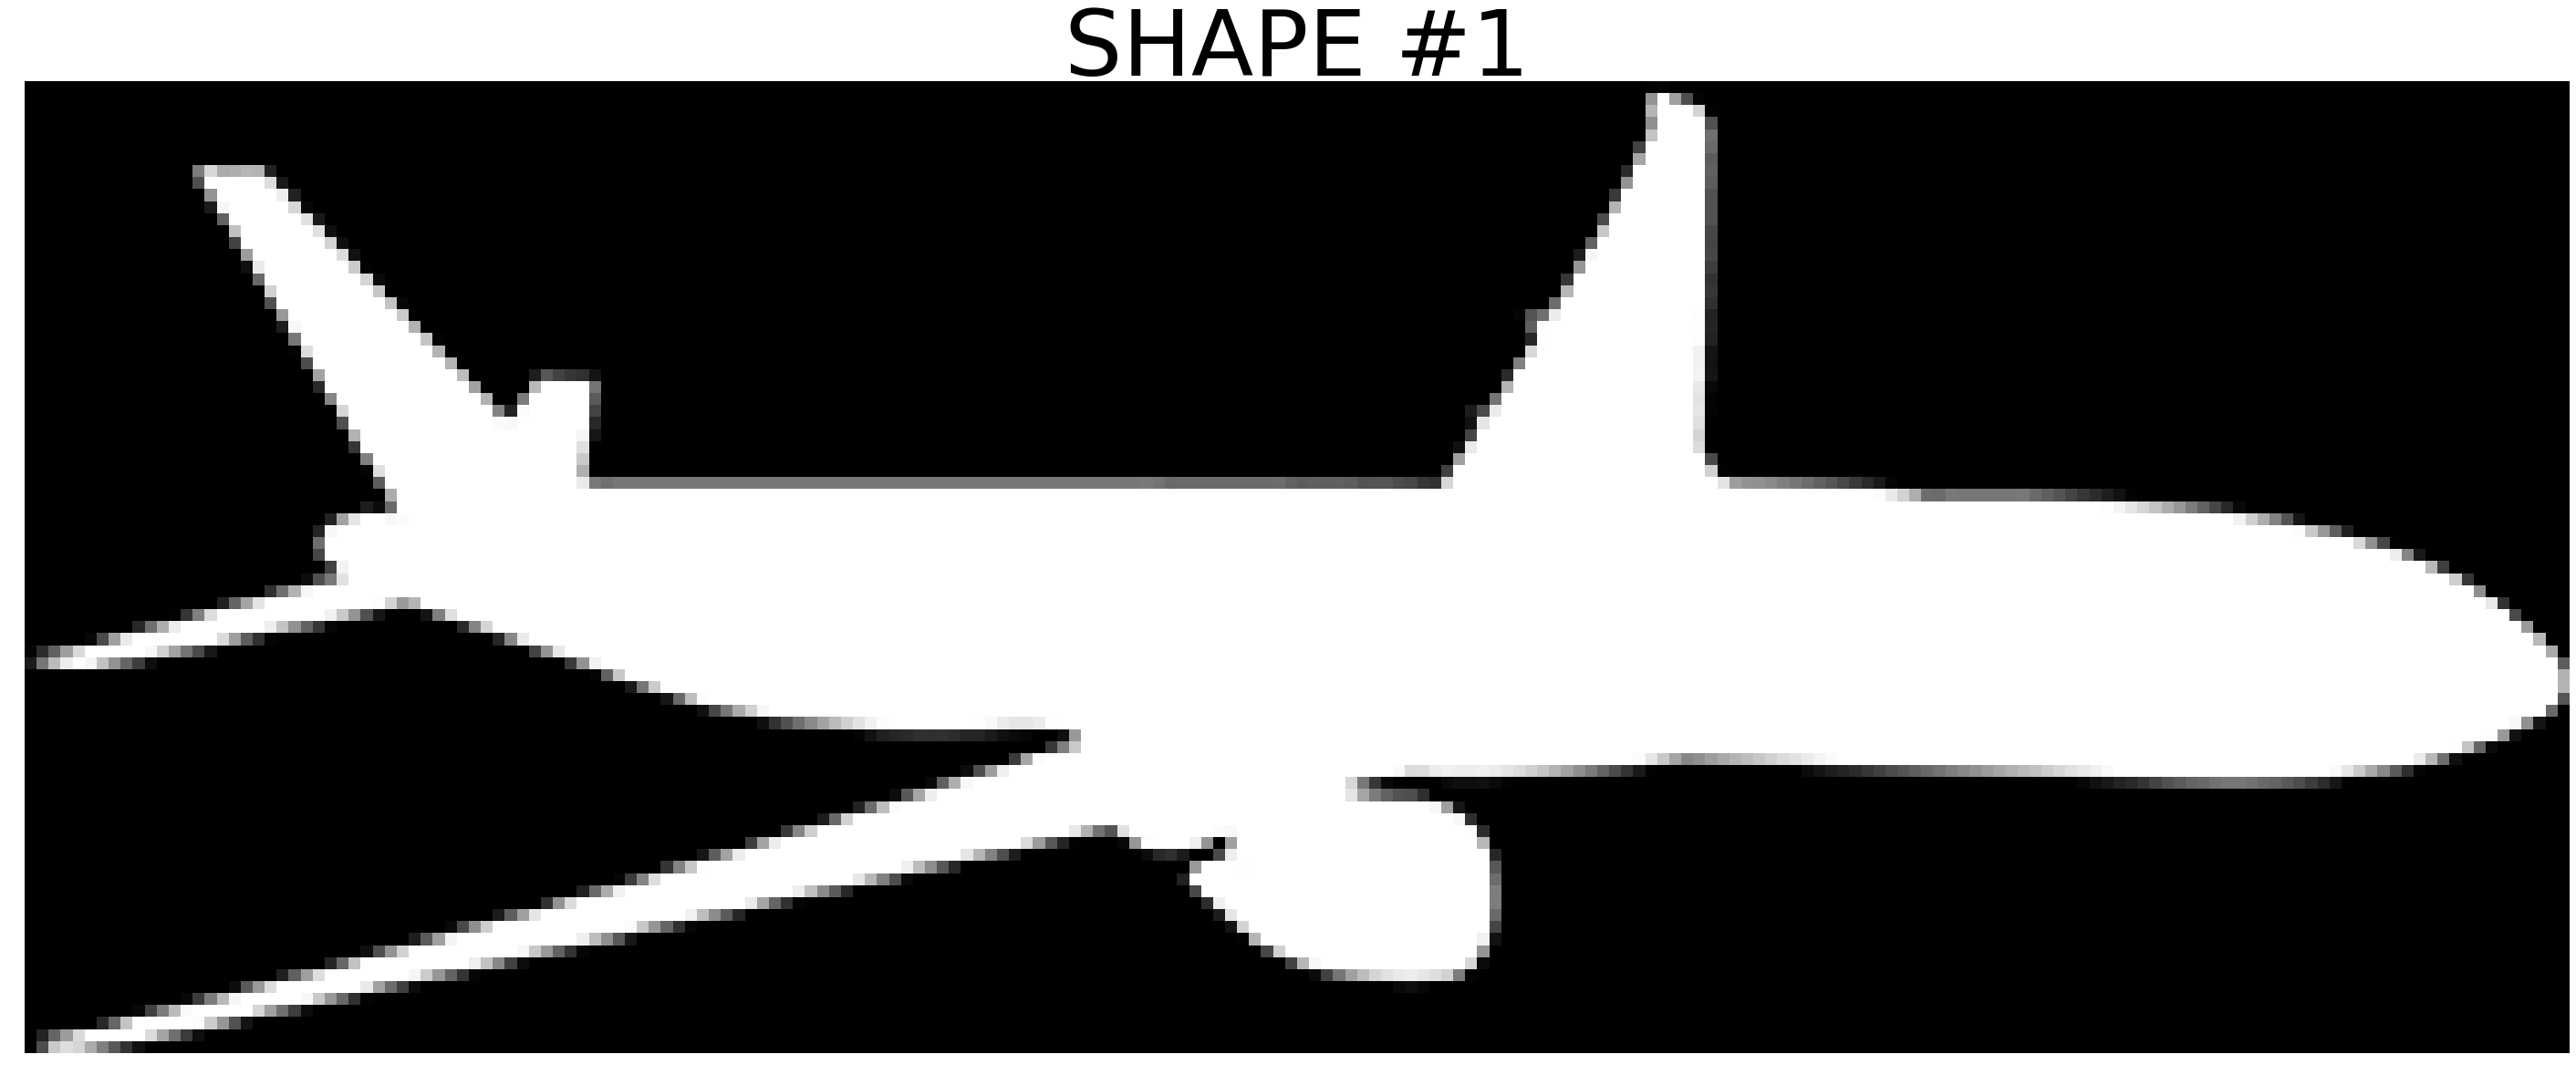

MOMENTS FOR PLANE #2: [ 1.80851599e-03  1.92184829e-06  5.41577862e-10  4.41334901e-11
  5.46923123e-21 -2.19817014e-14 -4.07951523e-21]


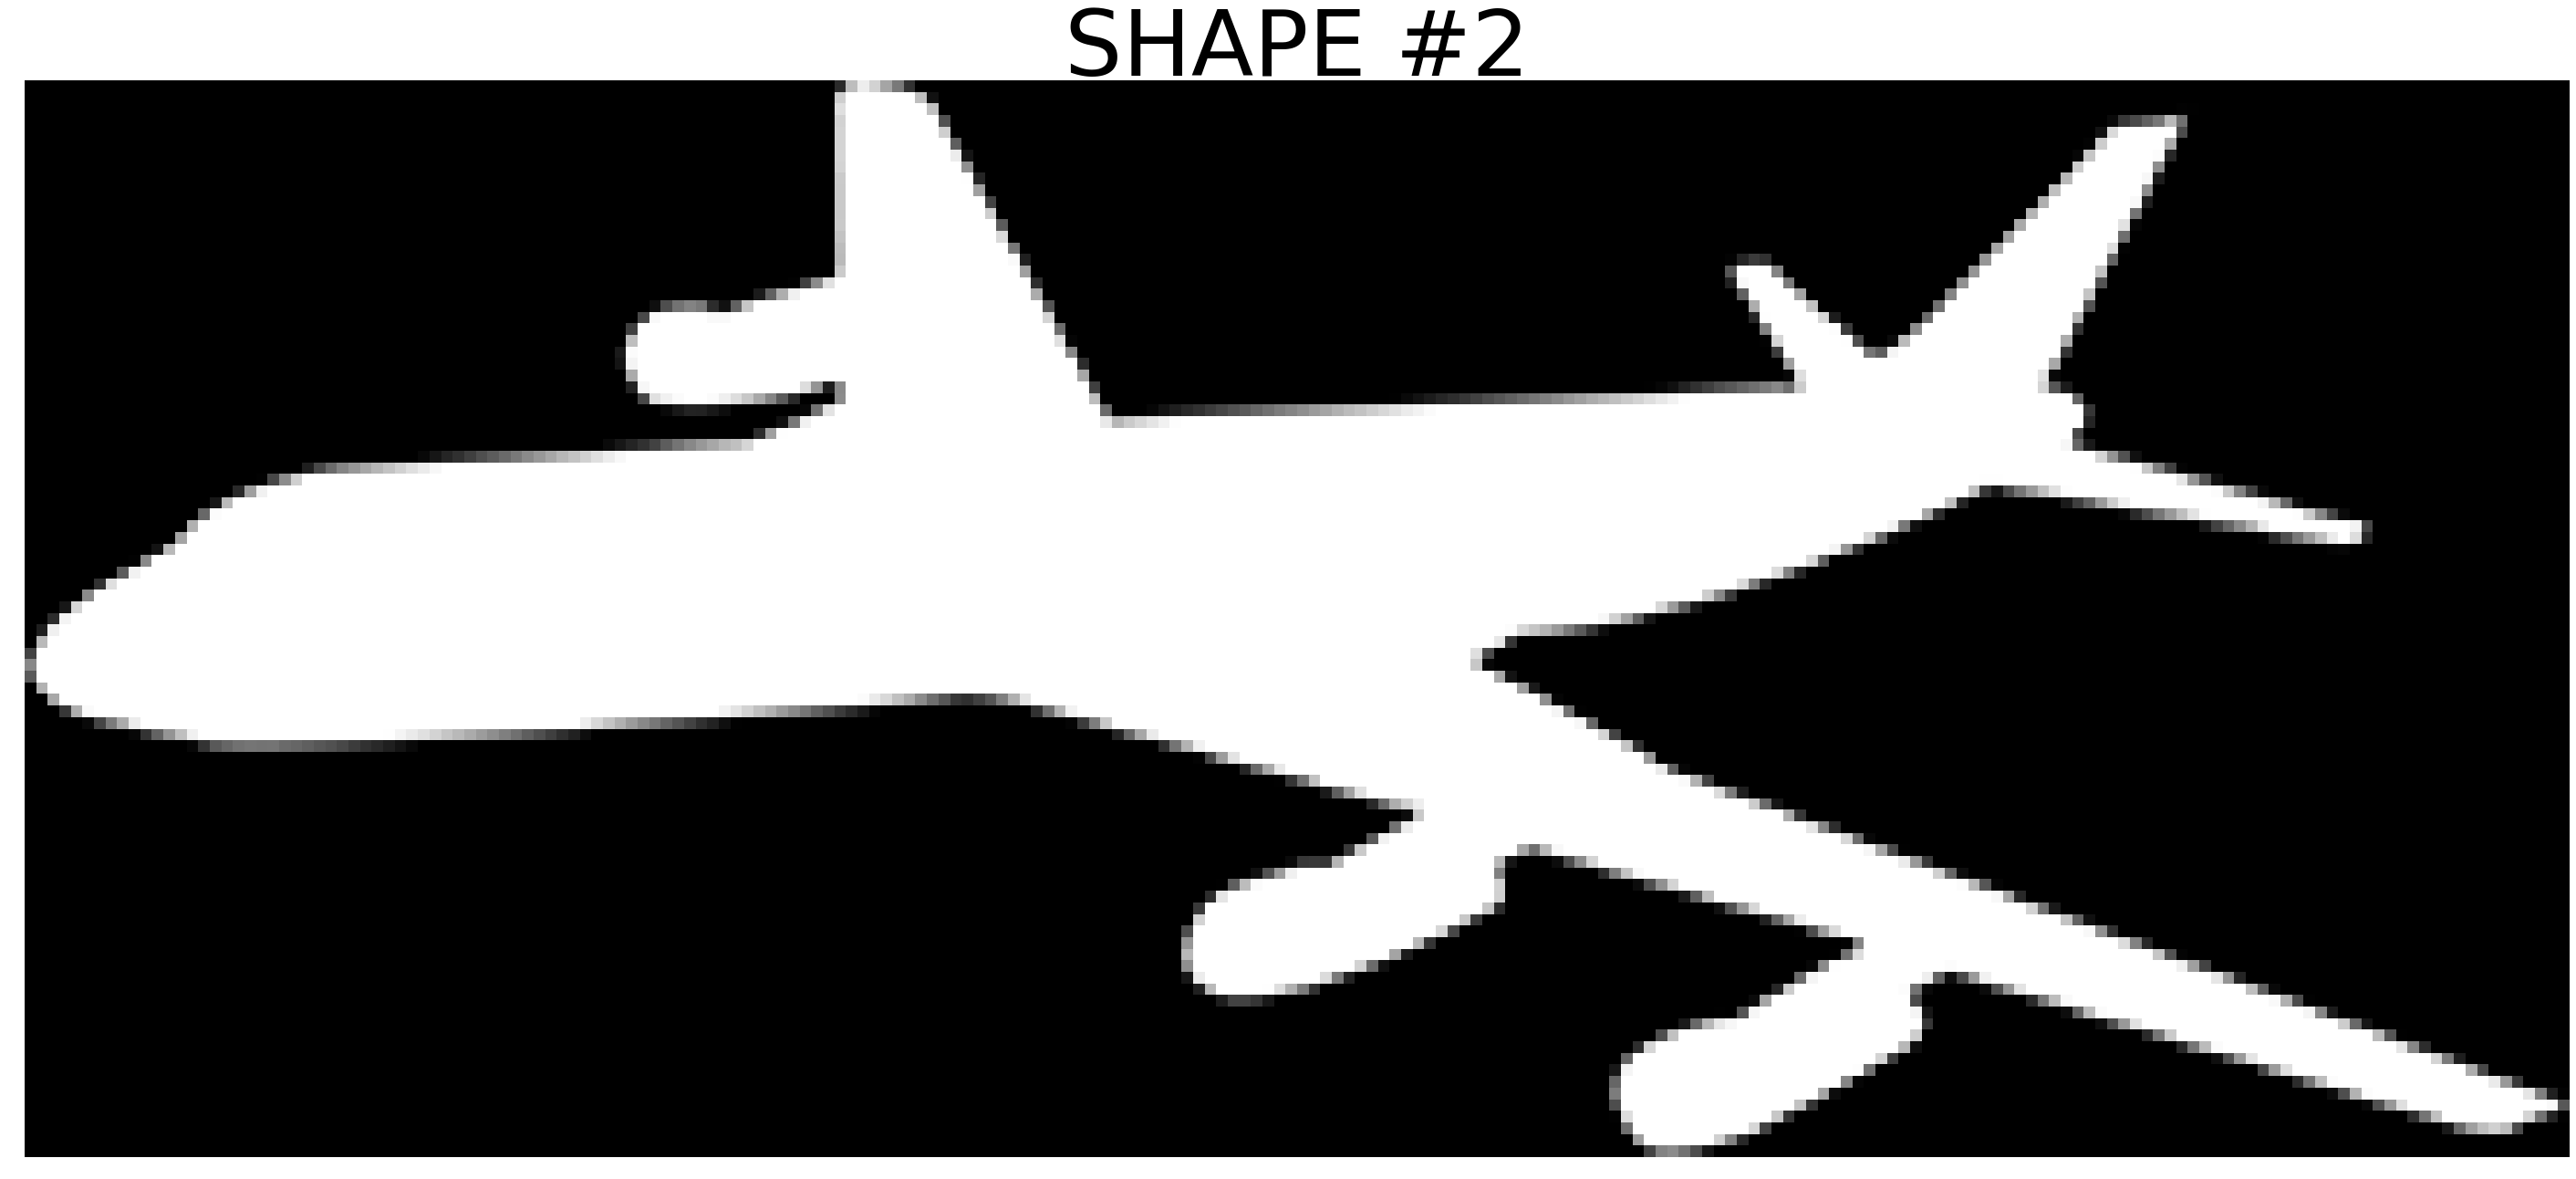

MOMENTS FOR PLANE #3: [1.18498670e-03 1.91160278e-07 5.89818694e-10 2.59586273e-14
 8.63387433e-26 2.03739557e-18 5.35057510e-26]


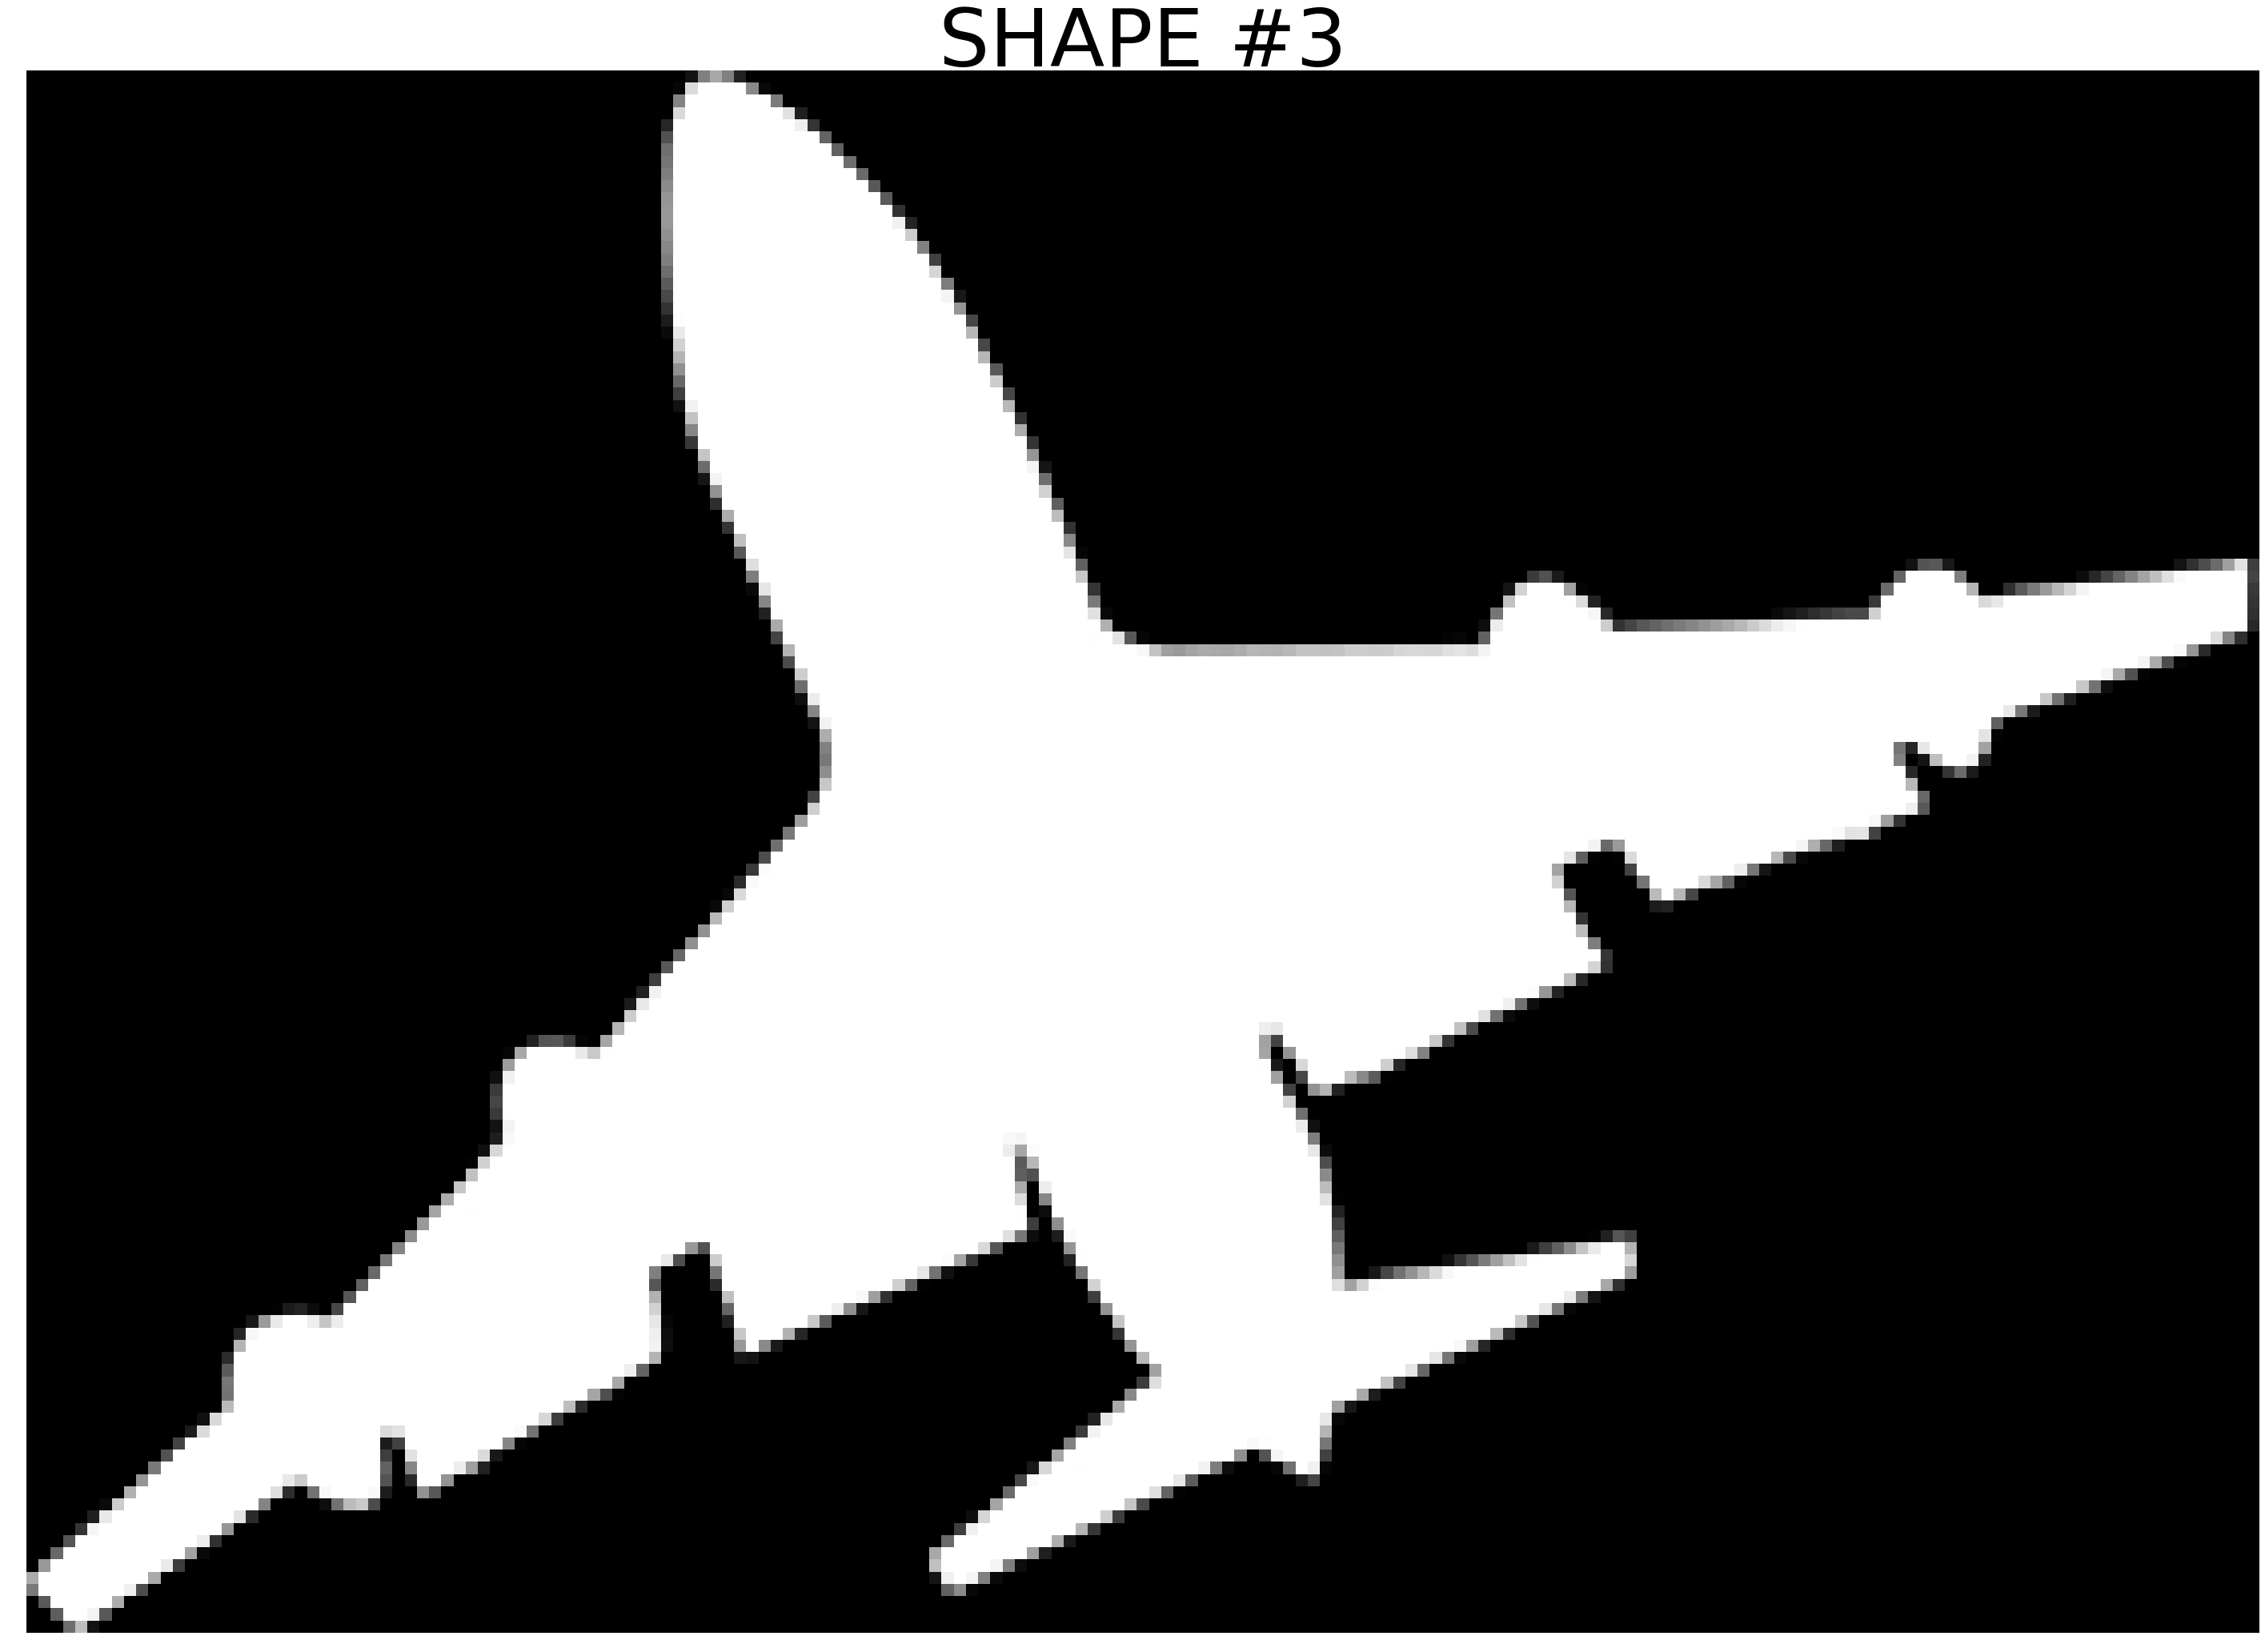

In [5]:
# Loop por cada contorno
for (i, c) in enumerate(cnts):
    # Extrai o ROI da imagem e computa o vetor de recursos de Hu Moments para ROI
    (x, y, w, h) = cv2.boundingRect(c)
    shape = image[y:y + h, x:x + w]

    # Calcula recursos Hu Moments para as imagens delimitadas pelos contornos (ISSO É O IDEAL)
    moments = cv2.HuMoments(cv2.moments(shape)).flatten()

    # Print moments e ROI
    print("MOMENTS FOR PLANE #{}: {}".format(i + 1, moments))
    show(shape, "SHAPE #{}".format(i + 1))